In [1]:
import warnings
warnings.filterwarnings('ignore')
import webbrowser
import re
import pandas as pd
import requests
import bs4
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as la
import numpy as np
import os
os.chdir(r'/Users/lixin/Desktop/learn/Python/project')  ## change cd import os  

# start getting data from one link

In [2]:
## start from one link
res = requests.get('https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2008')
noStarchSoup = bs4.BeautifulSoup(res.text)
elems = noStarchSoup.select('td')
num_row = []
for i in range(len(elems)):
    num_row.append(re.findall(r'\d+\.\d+', str(elems[i])))

In [4]:
## get time
elems = noStarchSoup.select('td')
get_time = []
for i in range(len(elems)):
    get_time.append(re.findall(r'\d+\/\d+\/\d+', str(elems[i])))
get_time_new_list = [i for i in get_time if i !=[]]
count_row = len(get_time_new_list[0])
change_date = []
for i in range(len(get_time_new_list[0])):
    split_data = get_time_new_list[0][i].split('/')
    append_value = int('20'+split_data[2]+split_data[0]+split_data[1])
    change_date.append(append_value)
my_time = pd.DataFrame(np.array(change_date).reshape((count_row,1)).tolist())
my_date = my_time.rename(columns={0: "date"})  

In [7]:
## get body and change to dataframe
fill_in = count_row * 13
value_wanted = num_row[1:][:fill_in]  
loop = len(value_wanted)
get_value = []
for i in range(loop):
    if value_wanted[i] == []:
        get_value.append('NULL')
    else: get_value.append(value_wanted[i][0])
data_body = pd.DataFrame(np.array(get_value).reshape((count_row,13)).tolist())
my_data = data_body.rename(columns={1: "1_Mo", 2: "2_Mo", 3: "3_Mo", 4: "6_Mo", 5: "1_Yr", 
                                        6: "2_Yr", 7: "3_Yr", 8: "5_Yr", 9: "7_Yr", 10: "10_Yr",
                                       11: "20_Yr", 12: "30_Yr"})  
final_data = pd.concat([my_date,my_data], axis=1).drop([0],axis = 1)
final_data.head()

,date,1_Mo,2_Mo,3_Mo,6_Mo,1_Yr,2_Yr,3_Yr,5_Yr,7_Yr,10_Yr,20_Yr,30_Yr
0,20080102,3.09,NULL,3.26,3.32,3.17,2.88,2.89,3.28,3.54,3.91,4.39,4.35
1,20080103,3.19,NULL,3.24,3.29,3.13,2.83,2.85,3.26,3.54,3.91,4.41,4.37
2,20080104,3.22,NULL,3.20,3.22,3.06,2.74,2.75,3.18,3.47,3.88,4.40,4.36
3,20080107,3.27,NULL,3.27,3.29,3.11,2.76,2.76,3.16,3.46,3.86,4.37,4.34
4,20080108,3.31,NULL,3.25,3.27,3.09,2.76,2.76,3.16,3.47,3.86,4.39,4.35


# end getting data from one link

# start getting 10 yrs data

In [21]:
## get all links
baseurl = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year='
tname = [str(x).zfill(4) for x in range(2009,2010)]
filelinks = [baseurl+x for x in tname]
for i in filelinks:
    res = requests.get(i)
    noStarchSoup = bs4.BeautifulSoup(res.text)
    elems = noStarchSoup.select('td')
    num_row = []
    for i in range(len(elems)):
        num_row.append(re.findall(r'\d+\.\d+', str(elems[i])))
        
## get date
    elems = noStarchSoup.select('td')
    get_time = []
    for i in range(len(elems)):
        get_time.append(re.findall(r'\d+\/\d+\/\d+', str(elems[i])))
    get_time_new_list = [i for i in get_time if i !=[]]
    count_row = len(get_time_new_list[0])
    change_date = []
    for i in range(len(get_time_new_list[0])):
        split_data = get_time_new_list[0][i].split('/')
        change_date.append('20'+split_data[2]+split_data[0]+split_data[1])
    my_time = pd.DataFrame(np.array(change_date).reshape((count_row,1)).tolist())
    my_date = my_time.rename(columns={0: "date"}) 

## get data
    fill_in = count_row * 13
    value_wanted = num_row[1:][:fill_in]  
    loop = len(value_wanted)
    get_value = []
    for i in range(loop):
        if value_wanted[i] == []:
            get_value.append('NULL')
        else: get_value.append(value_wanted[i][0])
    data_body = pd.DataFrame(np.array(get_value).reshape((count_row,13)).tolist())
    my_data = data_body.rename(columns={1: "1_Mo", 2: "2_Mo", 3: "3_Mo", 4: "6_Mo", 5: "1_Yr", 
                                        6: "2_Yr", 7: "3_Yr", 8: "5_Yr", 9: "7_Yr", 10: "10_Yr",
                                       11: "20_Yr", 12: "30_Yr"}) 
    final_data_temp = pd.concat([my_date,my_data], axis=1).drop([0],axis = 1)
    final_data = pd.concat([final_data,final_data_temp], axis=0)
final_data = final_data.sort_values(by="date" , ascending=True) 

In [23]:
final_data.head()

,date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2008-01-02,3.09,NULL,3.26,3.32,3.17,2.88,2.89,3.28,3.54,3.91,4.39,4.35
1,2008-01-03,3.19,NULL,3.24,3.29,3.13,2.83,2.85,3.26,3.54,3.91,4.41,4.37
2,2008-01-04,3.22,NULL,3.20,3.22,3.06,2.74,2.75,3.18,3.47,3.88,4.40,4.36
3,2008-01-07,3.27,NULL,3.27,3.29,3.11,2.76,2.76,3.16,3.46,3.86,4.37,4.34
4,2008-01-08,3.31,NULL,3.25,3.27,3.09,2.76,2.76,3.16,3.47,3.86,4.39,4.35


# end getting 10 yrs data

# start ploting

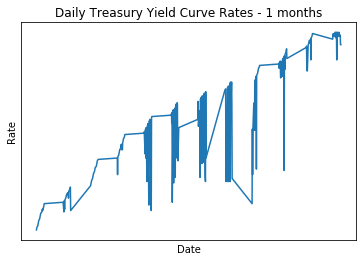

In [216]:
plt.plot(final_data['date'], final_data['1_Mo'])
plt.xticks([])  
plt.yticks([]) 
plt.title('Daily Treasury Yield Curve Rates - 1 months')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.savefig('Daily Treasury Yield Curve Rates - 1 months.jpg')

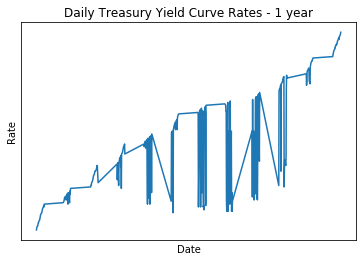

In [217]:
plt.plot(final_data['date'], final_data['1_Yr'])
plt.xticks([])  
plt.yticks([]) 
plt.title('Daily Treasury Yield Curve Rates - 1 year')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.savefig('Daily Treasury Yield Curve Rates - 1 year.jpg')

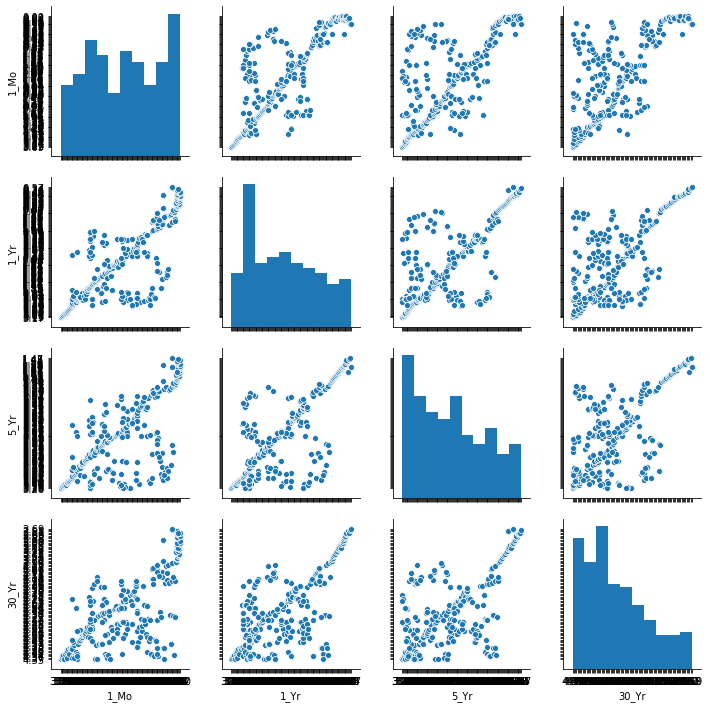

In [218]:
fig = sns.pairplot(final_data[['1_Mo','3_Mo','1_Yr','5_Yr','30_Yr']])
fig.savefig("pairplot.jpg")
## positive corr, decrease in the same time
## but not increase in the same time, copula should be used to measure covariance

# end plotting 

# start calculation

In [211]:
## load data
import os
os.chdir(r'/Users/lixin/Desktop/learn/Python/project')  ## change cd 
read_data = pd.read_csv('2008_SPX.csv')
read_data.head()

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,optionid,index_flag,issuer,exercise_style
0,20080102,20080104,20080102.0,C,1520000,0.05,0.1,33,246,33033474,1,CBOE S&P 500 INDEX,E
1,20080102,20080104,20080102.0,C,1425000,26.70,28.4,15,0,33033475,1,CBOE S&P 500 INDEX,E
2,20080102,20080104,20080102.0,C,1450000,9.00,10.3,31,0,33033476,1,CBOE S&P 500 INDEX,E
3,20080102,20080104,20080102.0,C,1465000,2.60,3.8,117,4,33033477,1,CBOE S&P 500 INDEX,E
4,20080102,20080104,20080102.0,C,1480000,0.60,0.7,530,23,33033478,1,CBOE S&P 500 INDEX,E


In [212]:
## get call option
filter_get_call = read_data["cp_flag"]=="C"
get_call = read_data.where(filter_get_call, inplace = False)
get_call['call_price'] = (read_data['best_bid'] + read_data['best_offer'])/2
get_call['call_k'] = read_data['strike_price'] /100000
get_call['T_t'] = read_data['exdate'] - read_data['date']
get_call = get_call[['date','T_t','cp_flag','call_k','call_price','volume']]

In [213]:
## filtering
get_call = get_call[get_call['volume']> 0]
get_call = get_call[get_call["call_price"] > 0.1]
get_call = get_call[get_call["T_t"] > 7]
get_call = get_call[get_call["T_t"] < 180]
get_call.head()

,date,T_t,cp_flag,call_k,call_price,volume
52,20080102.0,17,C,16.05,0.275,2030.0
53,20080102.0,17,C,16.10,0.275,34.0
55,20080102.0,17,C,16.20,0.150,10.0
68,20080102.0,17,C,16.00,0.150,3890.0
69,20080102.0,114,C,16.05,1.150,8.0


In [214]:
## merge rate && option data
merged_option = pd.merge(get_call, final_data, on=['date'])[['date','T_t','cp_flag','call_k','call_price','1_Mo']]
merged_option = merged_option.rename(columns={'1_Mo': "rate", 'T_t': "gap"})
merged_option.call_price = pd.to_numeric(merged_option.call_price, errors='coerce')
merged_option.rate = pd.to_numeric(merged_option.rate, errors='coerce')
merged_option.gap = pd.to_numeric(merged_option.gap, errors='coerce')
merged_option['processed_price'] = merged_option['call_price'] * np.exp(-merged_option['rate']/100*merged_option['gap'])
merged_option.head()

,date,gap,cp_flag,call_k,call_price,rate,processed_price
0,20080102.0,17,C,16.05,0.275,3.09,0.162629
1,20080102.0,17,C,16.10,0.275,3.09,0.162629
2,20080102.0,17,C,16.20,0.150,3.09,0.088707
3,20080102.0,17,C,16.00,0.150,3.09,0.088707
4,20080102.0,114,C,16.05,1.150,3.09,0.033951


In [215]:
## describe
merged_option[['gap','call_k','call_price','rate','processed_price']].describe()

,gap,call_k,call_price,rate,processed_price
count,17803.000000,17803.000000,17803.000000,17803.000000,17803.000000
mean,76.138460,12.714191,34.010761,1.257941,17.563344
std,41.750013,2.029579,64.550965,0.875368,40.009200
min,8.000000,2.000000,0.125000,0.000000,0.004203
25%,17.000000,11.700000,1.200000,0.260000,0.466438
50%,97.000000,13.250000,10.650000,1.530000,3.391708
75%,107.000000,14.150000,41.750000,1.840000,16.434860
max,130.000000,19.000000,769.850000,3.370000,690.209856


Text(0, 0.5, 'option_price')

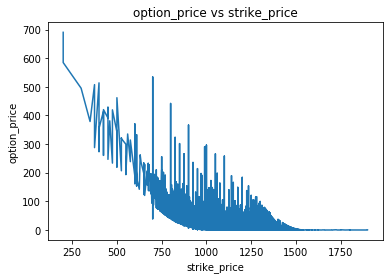

In [138]:
## plot Option Price VS Strike Price
merged_option = merged_option.sort_values(by="call_k" , ascending=True)
plt.plot(merged_option['call_k'],merged_option['processed_price'])
plt.title('Option Price VS Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')

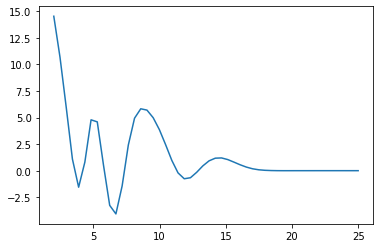

In [112]:
## cubic spline
def local2x(x,y,h,u):
    fu = []
    n = len(y)
    c = np.ones((n,1))
    for x0 in u:
        t = (x - x0)/h
        K = h**(-1)*np.exp(-0.5*t**2)/np.sqrt(2*np.pi)
        X = np.hstack((c,x-x0,(x-x0)**2))
        w = np.diagflat(K)
        beta =la.pinv(X.T.dot(w).dot(X)).dot(X.T).dot(w).dot(y) 
        fu.append(beta.copy())
    fu = np.asarray(fu)
    return fu

merged_option = merged_option.sort_values(by="call_k" , ascending=True)
length = len(merged_option['processed_price'])
min_k = min(merged_option['call_k'])
max_k = max(merged_option['call_k'])
y = np.asarray(merged_option['processed_price']).reshape(length,1)
x = np.asarray(merged_option['call_k']).reshape(length,1)
u = np.linspace(min_k,max_k,50)
h = 1
fu = local2x(x,y,h,u)
plt.plot(u,fu[:,-1])
plt.title('Option Price VS Strike Price after Cubic Spline')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')

Text(0, 0.5, 'Probability')

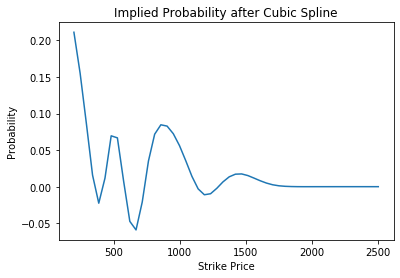

In [152]:
u_1 = u*100
fu_1 = fu[:,-1]
fu_1 = fu_1 / sum(fu_1)
plt.plot(u*100,fu_1)
plt.title('Implied Probability after Cubic Spline')
plt.xlabel('Strike Price')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

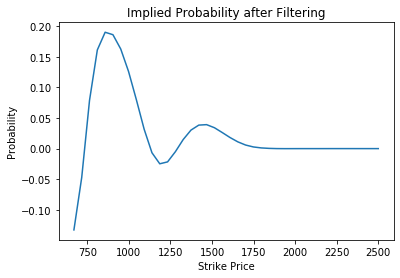

In [153]:
## filter cubic spline result
u_star = u[u > 6.5] * 100
fu_star = fu[u > 6.5,-1]
fu_star = fu_star / sum(fu_star)
plt.plot(u_star,fu_star)
plt.title('Implied Probability after Filtering')
plt.xlabel('Strike Price')
plt.ylabel('Probability')

In [200]:
## calculate implied moment
loop = len(fu_star)
mean = 0
for i in range(loop):
    mean = mean + fu_star[i]*u_star[i]
variance = 0
for i in range(loop):
    variance = variance + fu_star[i]*(u_star[i] - mean)**2
skewness = 0
for i in range(loop):
    skewness = skewness + fu_star[i]*((u_star[i] - mean)/np.sqrt(variance))**3
kurtosis = 0
for i in range(loop):
    kurtosis = kurtosis + fu_star[i]*((u_star[i] - mean)/np.sqrt(variance))**4
print(mean)
print(np.sqrt(variance))
print(skewness)
print(kurtosis)

[1058.12312628]
[219.3093739]
[2.25445546]
[3.8807622]


# calculate historical moment

In [202]:
stock_price = pd.read_csv('stock_price.csv')
stock_price = stock_price[['date','Adj Close']]
stock_price = stock_price.rename(columns={'Adj Close': "Adj_Close"})
stock_price.head()

,date,Adj_Close
0,20080102,1447.160034
1,20080103,1447.160034
2,20080104,1411.630005
3,20080107,1416.180054
4,20080108,1390.189941


In [189]:
lograte=np.log(stock_price.Adj_Close/stock_price.Adj_Close.shift(1))[1:]
lograte = pd.DataFrame(lograte)
lograte.head()

,Adj_Close
1,0.000000
2,-0.024858
3,0.003218
4,-0.018523
5,0.013532


In [207]:
print(np.mean(stock_price['Adj_Close']))
print(np.std(stock_price['Adj_Close'],ddof=1))
print(lograte.skew())
print(lograte.kurt())

1221.2991669761907
190.7570851162891
Adj_Close   -0.032839
dtype: float64
Adj_Close    3.752711
dtype: float64


In [197]:
lograte.skew()

Adj_Close   -0.032839
dtype: float64